# Import the packages


In [2]:
#pandas
import pandas as pd

#numpy
import numpy as np

#matplotlib
import matplotlib.pyplot as plt

#seaborn
import seaborn as sns

In [3]:
import openpyxl


In [4]:
# Load the data and show the first 5 observations
df_Superstore = pd.read_excel("Superstore Data.xlsx")
df_Superstore.head()

,State,Segment,Region,Ship Mode,Sales,Quantity,Discount,Profit
0,Kentucky,Consumer,South,Second Class,261.9600,2.0,0.00,41.9136
1,Kentucky,Consumer,South,Second Class,731.9400,3.0,0.00,219.5820
2,California,Corporate,West,Second Class,14.6200,2.0,0.00,6.8714
3,Florida,Consumer,South,Standard Class,957.5775,5.0,0.45,-383.0310
4,Florida,Consumer,South,Standard Class,22.3680,2.0,0.20,2.5164


### Data Overview 

In [4]:
df_Superstore.columns

Index(['State', 'Segment', 'Region', 'Ship Mode', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

**Data Dictionary**

 - 'State': Place(State) to which the customer belongs.
 - 'Segment': Product usage belongs.
 - 'Region': Region where product is delivered.
 - 'Ship Mode': Mode used to ship the product.
 - 'Sales': Sales in USD.
 - 'Quantity': Quantity of the product.
 - 'Discount': Discount on that deal.
 - 'Profit':Profit drawn from the deal.

### Basic Statistics of the Data

In [5]:
# Shape of the data
df_Superstore.shape

(1498, 8)

**We have 1498 Observations and 8 Attributes**

In [6]:
# Basic Information of the data
df_Superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498 entries, 0 to 1497
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   State      1423 non-null   object 
 1   Segment    1493 non-null   object 
 2   Region     1477 non-null   object 
 3   Ship Mode  1469 non-null   object 
 4   Sales      1468 non-null   float64
 5   Quantity   1491 non-null   float64
 6   Discount   1495 non-null   float64
 7   Profit     1495 non-null   float64
dtypes: float64(4), object(4)
memory usage: 93.8+ KB


**We have 4 Numerical and 4 Categorical Attributes**

**There is null values present in some attributes**

In [7]:
# Basic Description of the Data
df_Superstore.describe()

,Sales,Quantity,Discount,Profit
count,1.468000e+03,1.491000e+03,1495.000000,1495.000000
mean,4.541558e+06,2.236382e+12,0.160455,21.441985
std,1.478510e+08,6.432607e+13,0.208880,210.954594
min,1.080000e+00,1.000000e+00,0.000000,-3839.990400
25%,1.711200e+01,2.000000e+00,0.000000,1.712550
50%,5.305800e+01,3.000000e+00,0.200000,8.488800
75%,2.101925e+02,5.000000e+00,0.200000,28.137200
max,5.555556e+09,2.222222e+15,0.800000,3177.475000


**Self note(not by sir)**
 - Ages of Students: 
 - 25
 - 26
 - 27
 - 23
 - 24
 - 53 -> Outlier
 - 99% of the data lies within 23-27 age , so outlier is present which is data 53
 - in normal distribution if the difference between mean and median is more outlier is present the graph is skewed towards one side



<Axes: >

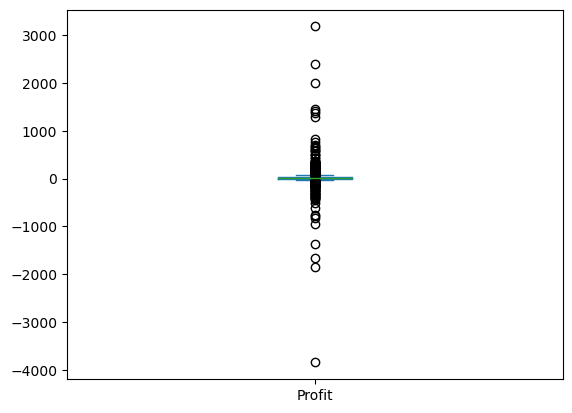

In [8]:
#not by sir 
df_Superstore.Profit.plot(kind="box")

<Axes: >

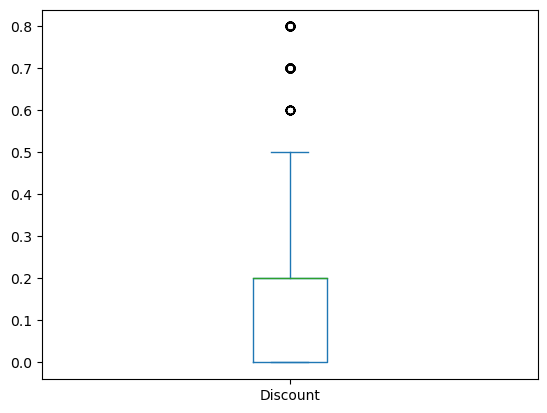

In [9]:
#not by sir
df_Superstore.Discount.plot(kind="box")

**there is a problem with Sales and Quantity columns**

**Good amount of outliers are present in the Profit column**

**Less amount of outliers are present in Discount column**

# Data Processing

## Sales

In [6]:
# find the min of the sales column
df_Superstore.Sales.min()

1.08

In [7]:
#find max of the sale column
df_Superstore.Sales.max()

5555555555.0

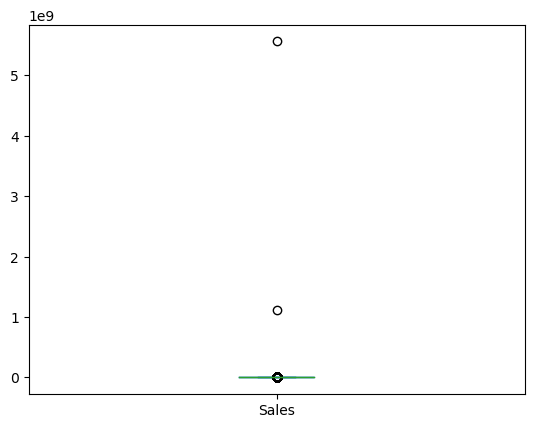

In [10]:
#plot the boxplotabs
df_Superstore.Sales.plot(kind="box")
# df_Superstore['Sales'].plot(kind="box")
plt.show()

In [13]:
#remove the first outlier
df_Superstore=df_Superstore[df_Superstore["Sales"] < df_Superstore["Sales"].mean()]

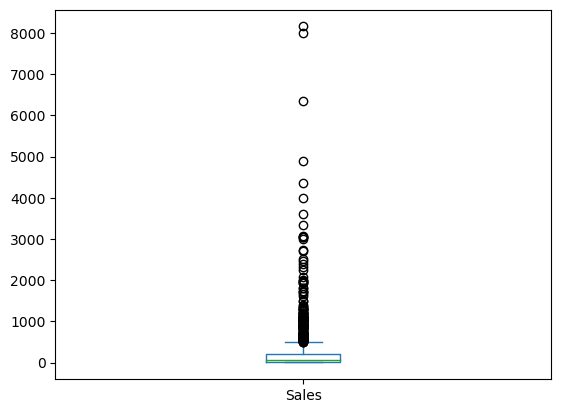

In [14]:
#plot the box diagram to check
df_Superstore['Sales'].plot(kind='box')
plt.show()

# Quantity

In [15]:
#find the min of the quantity
df_Superstore['Quantity'].min()

1.0

In [16]:
#mean
df_Superstore['Quantity'].mean()

2283866822682.627

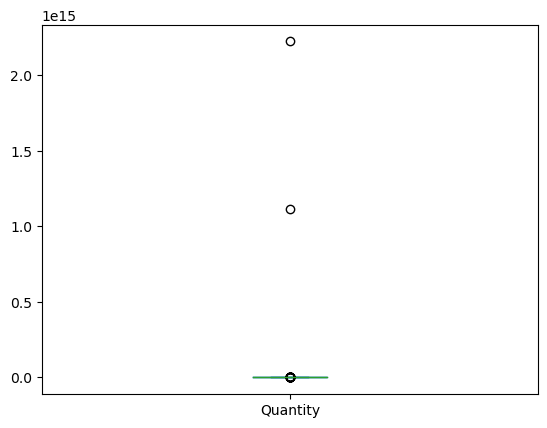

In [17]:
#plot the box to identify the outlier
df_Superstore['Quantity'].plot(kind='box')
plt.show()

In [18]:
#remove it
df_Superstore=df_Superstore[df_Superstore['Quantity'] < df_Superstore['Quantity'].mean()]

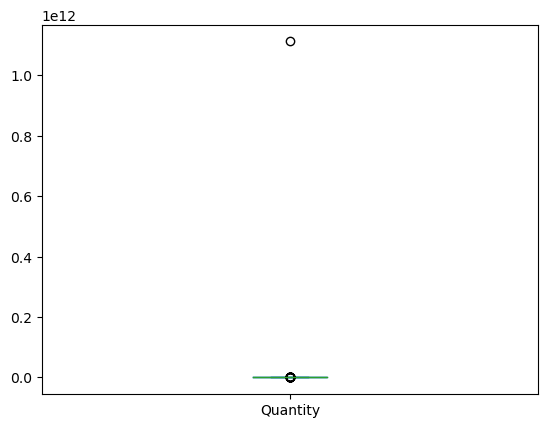

In [19]:
#plot the boxplot
df_Superstore['Quantity'].plot(kind='box')
plt.show()

In [20]:
#find the max again
df_Superstore['Quantity'].max()

1111111111111.0

In [21]:
#remove it
df_Superstore=df_Superstore[df_Superstore['Quantity'] < df_Superstore['Quantity'].mean()]

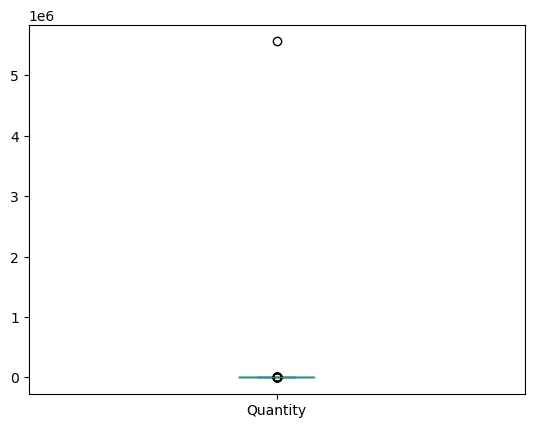

In [22]:
#plot the boxplot again
df_Superstore['Quantity'].plot(kind='box')
plt.show()

In [23]:
#find the max again
df_Superstore['Quantity'].max()

5555555.0

In [24]:
#remove it
df_Superstore=df_Superstore[df_Superstore['Quantity'] < df_Superstore['Quantity'].mean()]

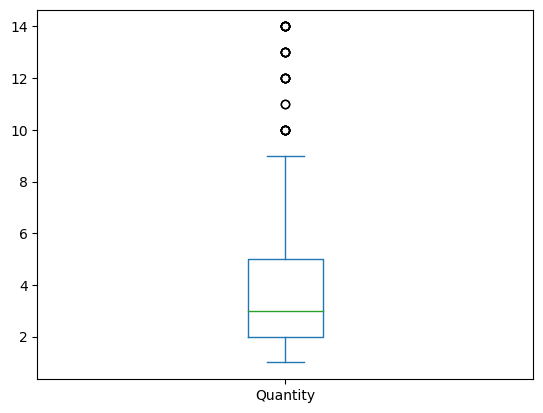

In [25]:
#plot the boxplot again
df_Superstore['Quantity'].plot(kind='box')
plt.show()

In [26]:
#find the max again
df_Superstore['Quantity'].max()

14.0

# Null value handling

In [27]:
#Number of Null Values
df_Superstore.isnull().sum()

State        72
Segment       5
Region       20
Ship Mode    29
Sales         0
Quantity      0
Discount      3
Profit        3
dtype: int64

In [28]:
# the Percentage of null values

df_Superstore.isnull().sum() / len(df_Superstore) * 100

State        4.945055
Segment      0.343407
Region       1.373626
Ship Mode    1.991758
Sales        0.000000
Quantity     0.000000
Discount     0.206044
Profit       0.206044
dtype: float64

In [29]:
len(df_Superstore)

1456

In [30]:
# Find the mode of that column

df_Superstore["State"].mode()

0    California
Name: State, dtype: object

In [31]:
# Impute the Null Values

df_Superstore["State"].fillna(df_Superstore["State"].mode()[0], inplace=True)

In [32]:
# Number of Null Values
df_Superstore.isnull().sum()

State         0
Segment       5
Region       20
Ship Mode    29
Sales         0
Quantity      0
Discount      3
Profit        3
dtype: int64

In [33]:
# For Categorical Data , we impute them with the Mode of the Columns

df_Superstore["Segment"].fillna(df_Superstore["Segment"].mode()[0], inplace=True)
df_Superstore["Region"].fillna(df_Superstore["Region"].mode()[0], inplace=True)
df_Superstore["Ship Mode"].fillna(df_Superstore["Ship Mode"].mode()[0], inplace=True)

In [34]:
# For Numerical Data , we impute them with the Mean of the Columns

df_Superstore["Discount"].fillna(df_Superstore["Discount"].mean(), inplace=True)
df_Superstore["Profit"].fillna(df_Superstore["Profit"].mean(), inplace=True)

In [35]:
# Number of Null Values
df_Superstore.isnull().sum()

State        0
Segment      0
Region       0
Ship Mode    0
Sales        0
Quantity     0
Discount     0
Profit       0
dtype: int64

In [36]:
# the Percentage of null values

df_Superstore.isnull().sum() / len(df_Superstore) * 100

State        0.0
Segment      0.0
Region       0.0
Ship Mode    0.0
Sales        0.0
Quantity     0.0
Discount     0.0
Profit       0.0
dtype: float64

## Univariate Analysis

In [37]:
df_Superstore.columns

Index(['State', 'Segment', 'Region', 'Ship Mode', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

### 1. State

#### Que: Find which state having highest sales


In [38]:
# Perform the value counts
df_Superstore.State.value_counts()

California              318
New York                183
Texas                   127
Pennsylvania            103
Ohio                     74
Illinois                 66
Washington               56
Florida                  55
Michigan                 46
Arizona                  43
Colorado                 43
North Carolina           35
Virginia                 31
Minnesota                29
Georgia                  28
New Jersey               24
Kentucky                 20
Indiana                  19
Tennessee                12
Alabama                  12
Iowa                     11
Utah                     11
Massachusetts            11
Wisconsin                10
Oregon                    9
Louisiana                 9
Delaware                  8
Arkansas                  8
Connecticut               8
Mississippi               7
New Hampshire             5
Rhode Island              5
Maryland                  5
Missouri                  5
Montana                   4
Nebraska            

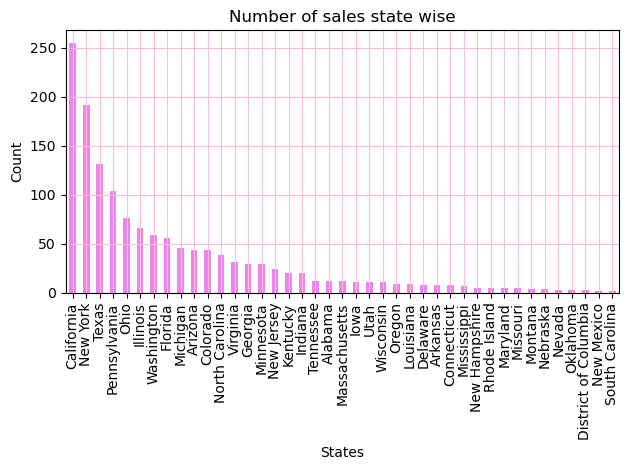

In [7]:
# Plot the value counts
# df_Superstore.State.value_counts().plot(kind="bar", color="violet")
df_Superstore['State'].value_counts().plot(kind="bar", color="violet")
#title
plt.title("Number of sales state wise")

# x axis
plt.xlabel("States")

# Y axis
plt.ylabel("Count")

# Give the grid with pink color
plt.grid(color='pink')

# setup the layoyut
plt.tight_layout()

#show the graph
plt.show()

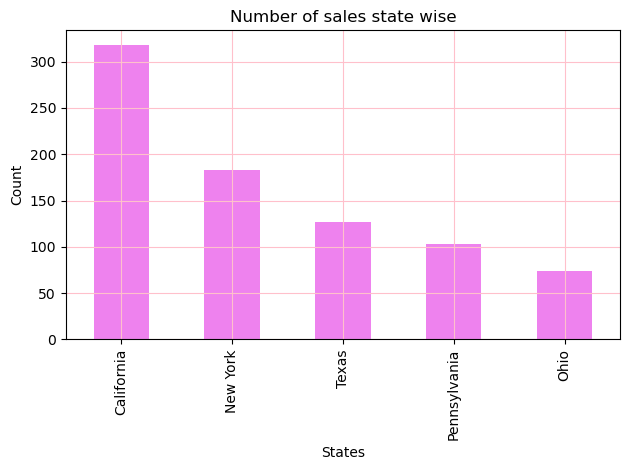

In [40]:
# Do the same for the top 5 state

# Plot the value counts
df_Superstore.State.value_counts().head().plot(kind="bar", color="violet")
#title
plt.title("Number of sales state wise")

# x axis
plt.xlabel("States")

# Y axis
plt.ylabel("Count")

# Give the grid with pink color
plt.grid(color='pink')

# setup the layoyut
plt.tight_layout()

#show the graph
plt.show()

In [41]:
# Fetch those to 5 states in string
df_Superstore.State.value_counts().head().index

Index(['California', 'New York', 'Texas', 'Pennsylvania', 'Ohio'], dtype='object')

In [42]:
df_Superstore.State.value_counts().head()

California      318
New York        183
Texas           127
Pennsylvania    103
Ohio             74
Name: State, dtype: int64

**Inference**
- Highest number of sales happened in california then 'New York', 'Texas', 'Pennsylvania', 'Ohio'

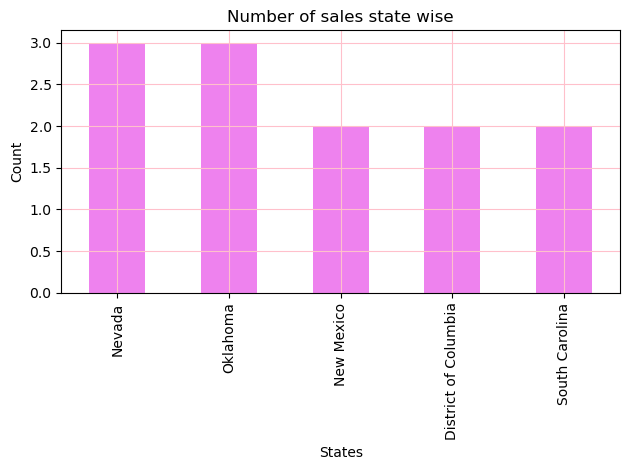

In [43]:
# Do the same for the last 5 state

# Plot the value counts
df_Superstore.State.value_counts().tail().plot(kind="bar", color="violet")
#title
plt.title("Number of sales state wise")

# x axis
plt.xlabel("States")

# Y axis
plt.ylabel("Count")

# Give the grid with pink color
plt.grid(color='pink')

# setup the layoyut
plt.tight_layout()

#show the graph
plt.show()

In [44]:
# Fetch those to 5 states in string
df_Superstore.State.value_counts().tail().index

Index(['Nevada', 'Oklahoma', 'New Mexico', 'District of Columbia',
       'South Carolina'],
      dtype='object')

**Inference**
- 'New Mexico', 'District of Columbia','South Carolina' these three having only 2 sales

### Segment

In [45]:
# Find the value counts
df_Superstore.Segment.value_counts()

Consumer       781
Corporate      415
Home Office    260
Name: Segment, dtype: int64

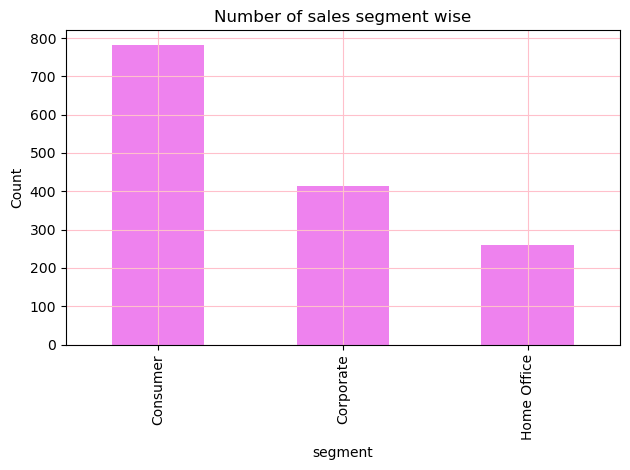

In [46]:
# Plot the value counts

# Plot the value counts
df_Superstore.Segment.value_counts().plot(kind="bar", color="violet")
#title
plt.title("Number of sales segment wise")

# x axis
plt.xlabel("segment")

# Y axis
plt.ylabel("Count")

# Give the grid with pink color
plt.grid(color='pink')

# setup the layoyut
plt.tight_layout()

#show the graph
plt.show()

In [47]:
# Find the top and last of segment
df_Superstore.State.value_counts().head()

California      318
New York        183
Texas           127
Pennsylvania    103
Ohio             74
Name: State, dtype: int64

In [48]:
df_Superstore.State.value_counts().tail()

Nevada                  3
Oklahoma                3
New Mexico              2
District of Columbia    2
South Carolina          2
Name: State, dtype: int64

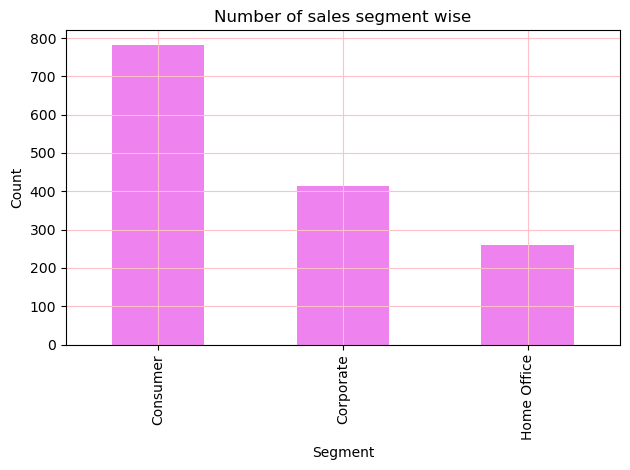

In [49]:
# Do the same for the top 5 state

# Plot the value counts
df_Superstore.Segment.value_counts().head().plot(kind="bar", color="violet")
#title
plt.title("Number of sales segment wise")

# x axis
plt.xlabel("Segment")

# Y axis
plt.ylabel("Count")

# Give the grid with pink color
plt.grid(color='pink')

# setup the layoyut
plt.tight_layout()

#show the graph
plt.show()

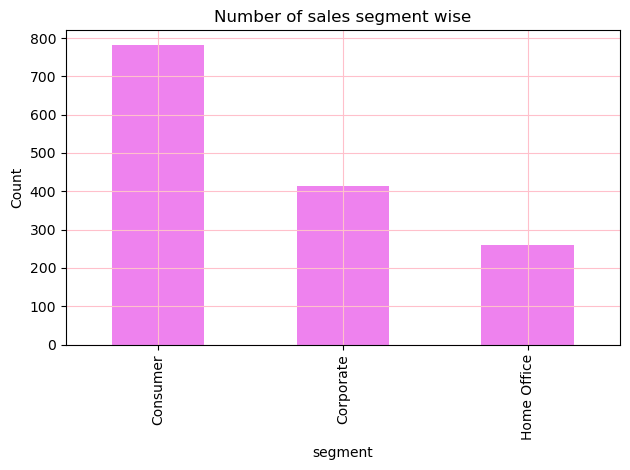

In [50]:
# Do the same for the last 5 state

# Plot the value counts
df_Superstore.Segment.value_counts().tail().plot(kind="bar", color="violet")
#title
plt.title("Number of sales segment wise")

# x axis
plt.xlabel("segment")

# Y axis
plt.ylabel("Count")

# Give the grid with pink color
plt.grid(color='pink')

# setup the layoyut
plt.tight_layout()

#show the graph
plt.show()

**Interpretation**
- Most of the time company serve to consumer directly
- And at the least we are serving to home office

In [51]:
df_Superstore.columns

Index(['State', 'Segment', 'Region', 'Ship Mode', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

### Region

In [52]:
# Find the value counts
df_Superstore.Region.value_counts()

East       468
West       433
Central    330
South      225
Name: Region, dtype: int64

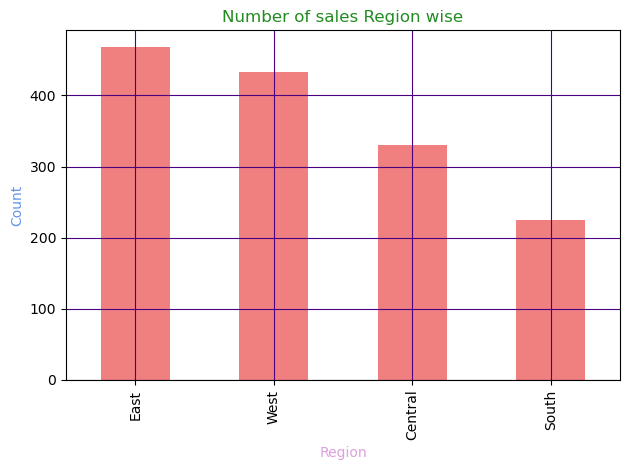

In [53]:
# Plot the value counts

# Plot the value counts
df_Superstore.Region.value_counts().plot(kind="bar", color="lightcoral")
#title
plt.title("Number of sales Region wise", color='forestgreen')

# x axis
plt.xlabel("Region",color='plum')

# Y axis
plt.ylabel("Count",color='cornflowerblue')

# Give the grid with indigo color
plt.grid(color='indigo')

# setup the layoyut
plt.tight_layout()

#show the graph
plt.show()

**Inference**
- Most of the sales happened in "East" region.
- At the same time least sales happened in "South" region.


In [54]:
df_Superstore.columns

Index(['State', 'Segment', 'Region', 'Ship Mode', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

### Shipmode

In [55]:
# Find the value counts
df_Superstore["Ship Mode"].value_counts()

Standard Class    846
Second Class      291
First Class       264
Same Day           55
Name: Ship Mode, dtype: int64

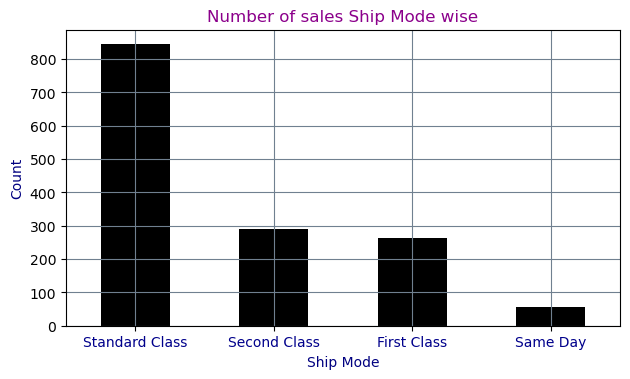

In [56]:
# Plot the value counts

# Plot the value counts
df_Superstore["Ship Mode"].value_counts().plot(kind="bar", color="black")
#title
plt.title("Number of sales Ship Mode wise", color='darkmagenta')

# x axis
plt.xlabel("Ship Mode",color='navy')

# Y axis
plt.ylabel("Count",color='navy')

# Give the grid with bisque color
plt.grid(color='slategrey')

# setup the layoyut
plt.tight_layout()

# rotate the x labels
plt.xticks(rotation=0,color='darkblue')
plt.xticks(color='darkblue')

#show the graph
plt.show()

**Inference**
- Most of the people opt for "Standard class" shipping mode.
- There is some consumers ask for "same day" shipping mode

In [57]:
df_Superstore.columns

Index(['State', 'Segment', 'Region', 'Ship Mode', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

### Sales

In [58]:
# Find the value counts
df_Superstore["Sales"].value_counts()

12.960     9
15.552     8
32.400     6
25.920     5
6.480      5
          ..
2.376      1
801.568    1
14.952     1
22.620     1
13.120     1
Name: Sales, Length: 1281, dtype: int64

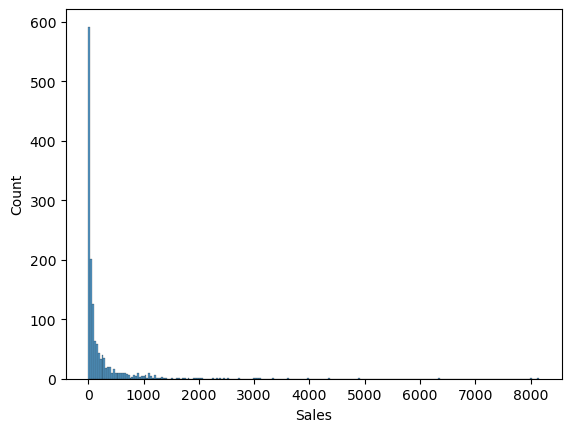

In [59]:
sns.histplot(df_Superstore["Sales"])
plt.show()

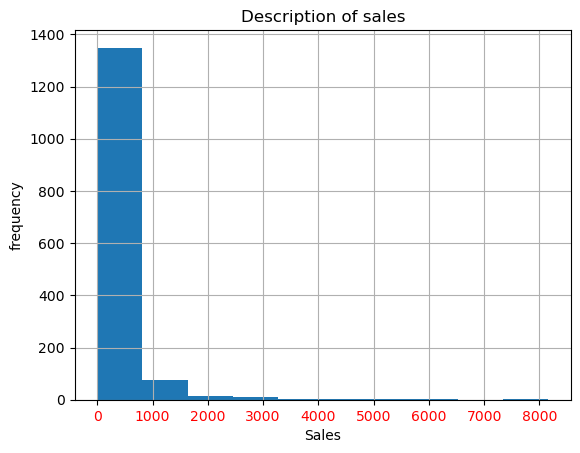

In [60]:
# plot the histogram and KDE plot for the Sales column

df_Superstore.Sales.plot(kind='hist')
plt.title("Description of sales")
plt.xlabel("Sales")
plt.xticks(color='red')
plt.ylabel("frequency")
plt.grid()
plt.show()

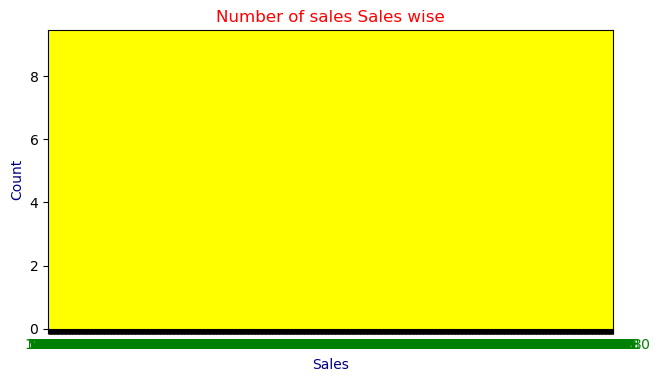

In [12]:
# Plot the value counts
df_Superstore["Sales"].value_counts().plot(kind="bar", color="black")
#title
plt.title("Number of sales Sales wise", color='red')

# x axis
plt.xlabel("Sales",color='navy')

# Y axis
plt.ylabel("Count",color='navy')

# Give the grid with bisque color
plt.grid(color='yellow')

# setup the layoyut
plt.tight_layout()

# rotate the x labels
plt.xticks(rotation=0,color='green')
# plt.xticks(color='pink')

#show the graph
plt.show()

In [62]:
#find the min sales
df_Superstore.Sales.min()

1.08

In [63]:
# max sales
df_Superstore.Sales.max()

8159.952

In [13]:
# average
round(df_Superstore.Sales.mean(),2)

4541557.69

In [65]:
#check if there is outlier present in dataframe or not

round(df_Superstore.Sales.mean()-df_Superstore.Sales.median(),2)

178.92

**Inference**

- min sales :1.08
- max sales :8159.952
- average sales : 231.98
- most of sales happened in 0 to 900
- as we can see in last code, there is large diff between mean and median of the sales column so it proves that there is outlier present

In [66]:
df_Superstore.columns


Index(['State', 'Segment', 'Region', 'Ship Mode', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

# Quantity

In [67]:
#min
df_Superstore.Quantity.min()

1.0

In [68]:
#max
df_Superstore.Quantity.max()

14.0

In [15]:
#mean
df_Superstore.Quantity.mean().round(2)

2236381999407.63

In [14]:
#checking outliers :
round(df_Superstore.Quantity.mean()-df_Superstore.Quantity.median(),2)

2236381999404.63

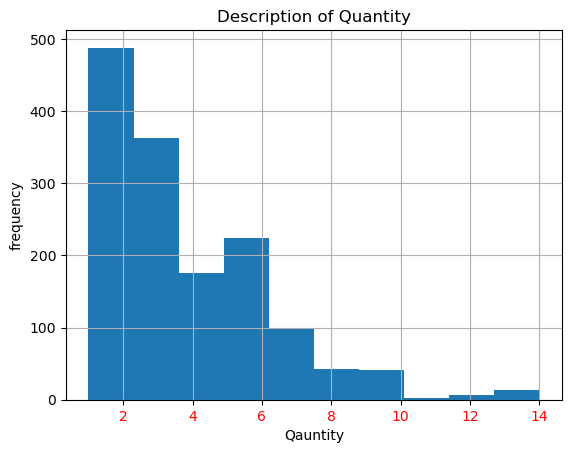

In [71]:
# plot the histogram and KDE plot for the Sales column

df_Superstore.Quantity.plot(kind='hist')
plt.title("Description of Quantity")
plt.xlabel("Qauntity")
plt.xticks(color='red')
plt.ylabel("frequency")
plt.grid()
plt.show()

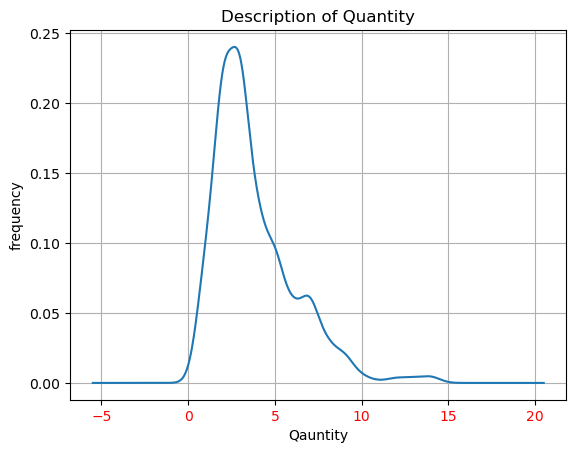

In [72]:
# plot the histogram and KDE plot for the Sales column

df_Superstore.Quantity.plot(kind='kde')
plt.title("Description of Quantity")
plt.xlabel("Qauntity")
plt.xticks(color='red')
plt.ylabel("frequency")
plt.grid()
plt.show()

**Interpretation**

- min quantity :1.0
- max quantity :14.0
- average quantity :3.8w
- outliers are not present in the df.


In [73]:
df_Superstore.columns

Index(['State', 'Segment', 'Region', 'Ship Mode', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

# Discount

In [74]:
df_Superstore.Discount.min()

0.0

In [75]:
df_Superstore.Discount.max()

0.8

In [76]:
df_Superstore.Discount.mean()

0.16041293874741916

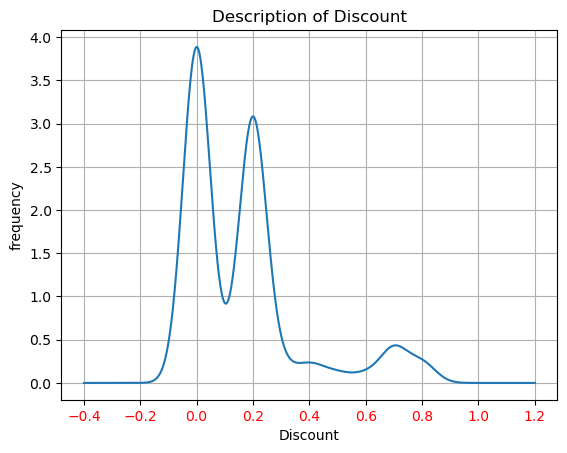

In [77]:
# plot the histogram and KDE plot for the Discount column

df_Superstore.Discount.plot(kind='kde')
plt.title("Description of Discount")
plt.xlabel("Discount")
plt.xticks(color='red')
plt.ylabel("frequency")
plt.grid()
plt.show()

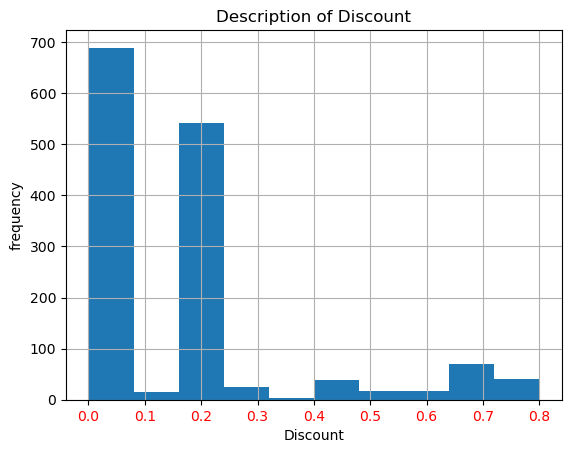

In [78]:
# plot the histogram and KDE plot for the Sales column

df_Superstore.Discount.plot(kind='hist')
plt.title("Description of Discount")
plt.xlabel("Discount")
plt.xticks(color='red')
plt.ylabel("frequency")
plt.grid()
plt.show()

In [79]:
df_Superstore.groupby('State')['Discount'].mean()

State
Alabama                 0.000000
Arizona                 0.348837
Arkansas                0.000000
California              0.085253
Colorado                0.311628
Connecticut             0.000000
Delaware                0.000000
District of Columbia    0.000000
Florida                 0.300909
Georgia                 0.000000
Illinois                0.397885
Indiana                 0.000000
Iowa                    0.000000
Kentucky                0.000000
Louisiana               0.000000
Maryland                0.000000
Massachusetts           0.000000
Michigan                0.006522
Minnesota               0.000000
Mississippi             0.000000
Missouri                0.000000
Montana                 0.000000
Nebraska                0.000000
Nevada                  0.133333
New Hampshire           0.000000
New Jersey              0.012500
New Mexico              0.000000
New York                0.053552
North Carolina          0.288571
Ohio                    0.312162
Okla

In [80]:
df_Superstore.groupby('Region').mean()

C:\Users\ABCD\AppData\Local\Temp\ipykernel_14512\3496434376.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_Superstore.groupby('Region').mean()


,Sales,Quantity,Discount,Profit
Region,,,,
Central,258.760025,3.954545,0.228304,2.116955
East,201.401818,3.811966,0.153419,23.140071
South,263.763207,3.426667,0.140491,27.409032
West,228.112334,3.854503,0.126583,30.447306


In [81]:
df_Superstore.groupby('Region')['Discount'].mean()

Region
Central    0.228304
East       0.153419
South      0.140491
West       0.126583
Name: Discount, dtype: float64

In [82]:
df_Superstore.groupby('Segment')['Discount'].mean()

Segment
Consumer       0.157184
Corporate      0.167639
Home Office    0.158579
Name: Discount, dtype: float64

In [83]:
df_Superstore.columns

Index(['State', 'Segment', 'Region', 'Ship Mode', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

# Profit

In [84]:
df_Superstore.Profit.min()

-3839.9904

In [85]:
df_Superstore.Profit.max()

3177.475

In [86]:
df_Superstore.Profit.mean()

21.208010874053684

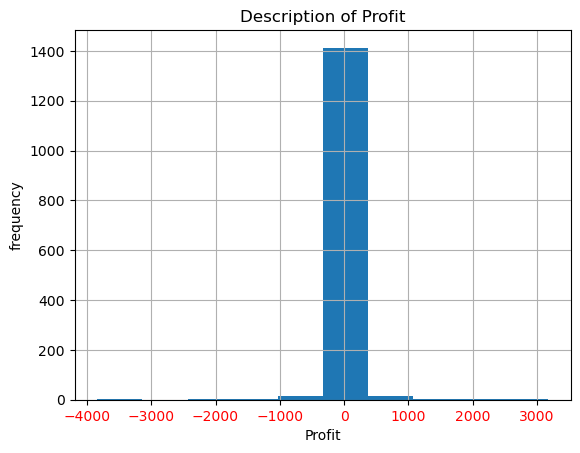

In [87]:
# plot the histogram and KDE plot for the Profit column

df_Superstore.Profit.plot(kind='hist')
plt.title("Description of Profit")
plt.xlabel("Profit")
plt.xticks(color='red')
plt.ylabel("frequency")
plt.grid()
plt.show()

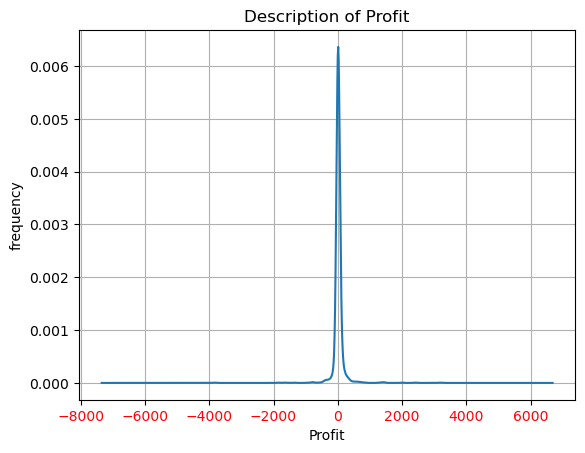

In [88]:
df_Superstore.Profit.plot(kind='kde')
plt.title("Description of Profit")
plt.xlabel("Profit")
plt.xticks(color='red')
plt.ylabel("frequency")
plt.grid()
plt.show()

# Bivariate analysis


In [89]:
df_Superstore.groupby('Region')['Profit'].mean()


Region
Central     2.116955
East       23.140071
South      27.409032
West       30.447306
Name: Profit, dtype: float64

In [90]:
df_Superstore.groupby('State')['Profit'].mean()


State
Alabama                 179.409442
Arizona                 -28.602965
Arkansas                 61.495113
California               30.973602
Colorado                 -5.292500
Connecticut               8.488675
Delaware                 22.660800
District of Columbia    162.875550
Florida                 -16.464102
Georgia                 157.129843
Illinois                -26.725100
Indiana                  24.964468
Iowa                     22.409645
Kentucky                 45.925815
Louisiana                57.005956
Maryland                 43.807980
Massachusetts            32.133482
Michigan                 88.178687
Minnesota                54.427714
Mississippi              74.214573
Missouri                 85.181240
Montana                 363.887875
Nebraska                 20.703450
Nevada                   27.046500
New Hampshire            33.997580
New Jersey               47.096196
New Mexico               33.872300
New York                 64.198957
North Carolina

In [91]:
df_Superstore.groupby('Segment')['Profit'].mean()


Segment
Consumer       20.950912
Corporate      11.211380
Home Office    37.936455
Name: Profit, dtype: float64

# Bivariate analysis using chatgpt


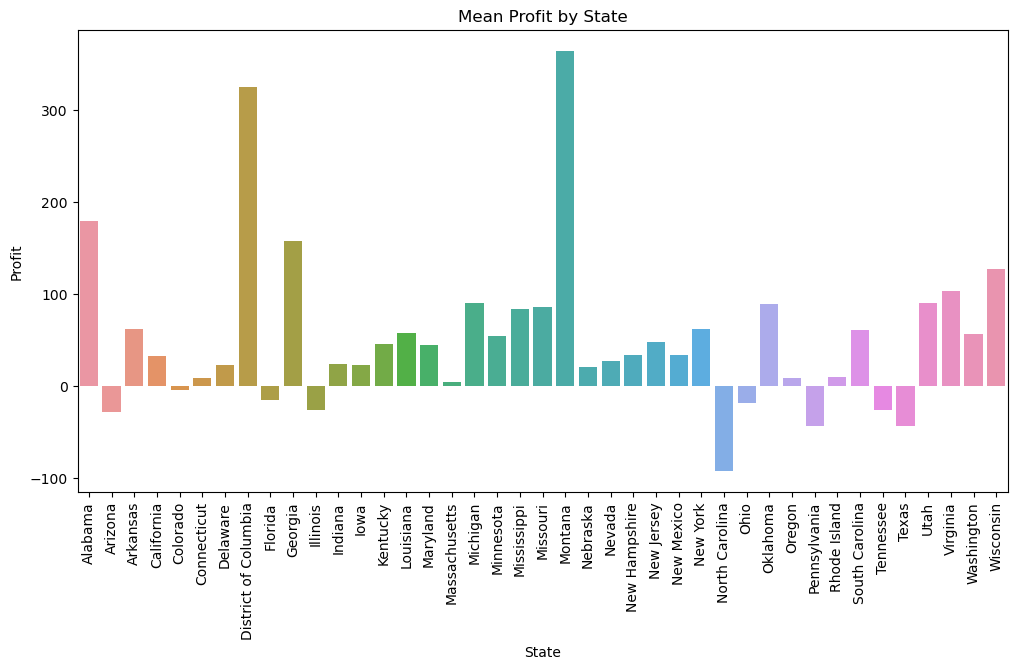

In [17]:
# Bivariate Analysis: State vs. Profit
state_profit = df_Superstore.groupby('State')['Profit'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Profit', data=state_profit)
plt.title('Mean Profit by State')
plt.xticks(rotation=90)
plt.show()

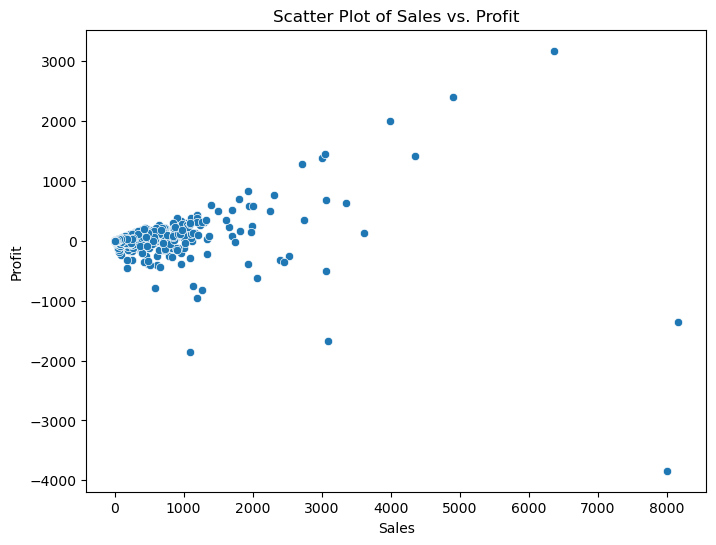

In [93]:
# Bivariate Analysis: Sales vs. Profit
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sales', y='Profit', data=df_Superstore)
plt.title('Scatter Plot of Sales vs. Profit')
plt.show()

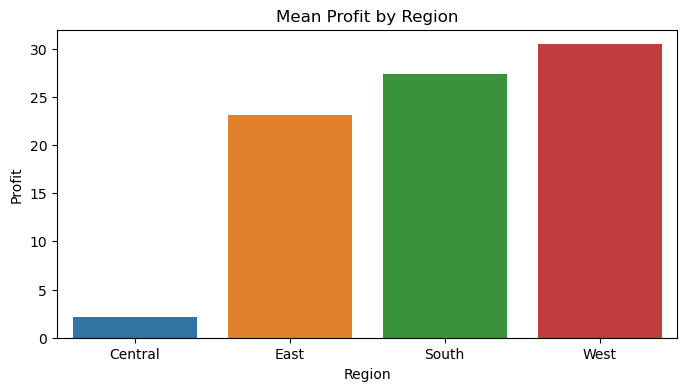

In [94]:
# Bivariate Analysis: Region vs. Profit
region_profit = df_Superstore.groupby('Region')['Profit'].mean().reset_index()
plt.figure(figsize=(8, 4))
sns.barplot(x='Region', y='Profit', data=region_profit)
plt.title('Mean Profit by Region')
plt.show()


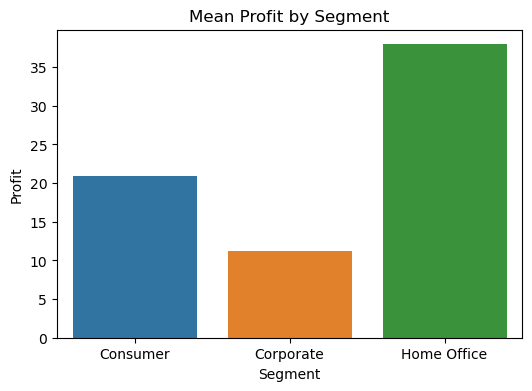

In [95]:
# Bivariate Analysis: Segment vs. Profit
segment_profit = df_Superstore.groupby('Segment')['Profit'].mean().reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(x='Segment', y='Profit', data=segment_profit)
plt.title('Mean Profit by Segment')
plt.show()


C:\Users\ABCD\AppData\Local\Temp\ipykernel_14512\2776564858.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_Superstore.corr()


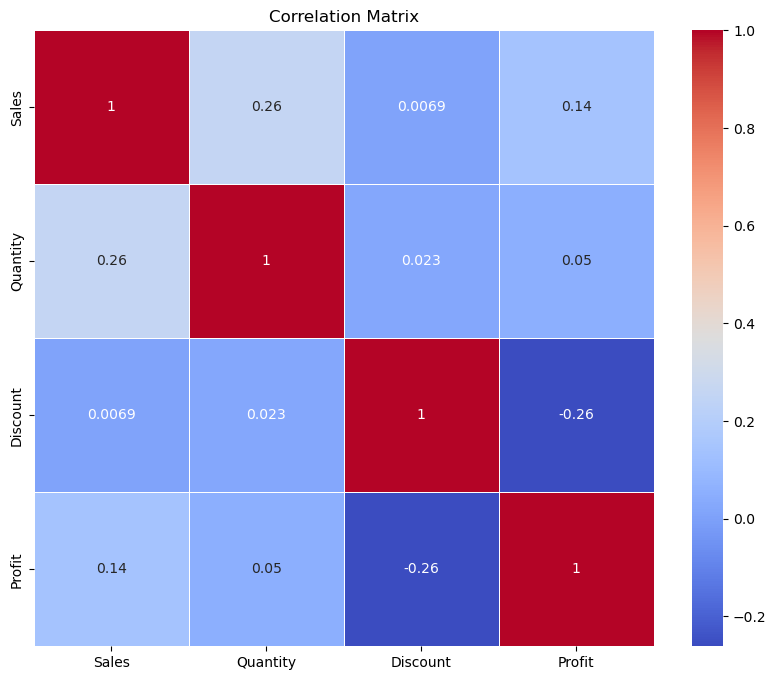

In [96]:
correlation_matrix = df_Superstore.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Multivariate analysis using ChatGpt


In [100]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [104]:
!pip install watermark

In [105]:
%load_ext watermark


In [106]:
%watermark -a "Dhruvisha" -d -t -v -p numpy,pandas,statsmodels


Author: Dhruvisha

Python implementation: CPython
Python version       : 3.10.9
IPython version      : 8.10.0

numpy      : 1.23.5
pandas     : 1.5.3
statsmodels: 0.13.5



In [111]:
import statsmodels.api as sm
import pandas as pd

# Assuming you have loaded your DataFrame df_Superstore and converted 'Region' into dummy variables

X = df_Superstore[['Sales', 'Quantity', 'Discount'] + list(df_Superstore.columns[df_Superstore.columns.str.startswith('Region_')])]
X = sm.add_constant(X)
y = df_Superstore['Profit']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     23.37
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           1.82e-26
Time:                        09:58:46   Log-Likelihood:                -9803.3
No. Observations:                1456   AIC:                         1.962e+04
Df Residuals:                    1449   BIC:                         1.966e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.8674     15.559      2.691   